## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [7]:
import os
import keras
from keras.layers import BatchNormalization

import itertools
# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [8]:
train, test = keras.datasets.cifar10.load_data()

In [9]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [10]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [35]:

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
#             input_layer = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
#             x = BatchNormalization()(x)

            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            
            x = BatchNormalization()(x)

    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

## BN Before activation

In [36]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [ 2, 16, 32, 128, 256 ]
MOMENTUM = 0.95

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for b in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=b, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    results[b] = [train_loss, valid_loss, train_acc, train_loss]
    

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_20 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_21 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_22 (Batc (None, 128)               512

KeyboardInterrupt: 

In [17]:
x_train.shape[1:]

(3072,)

In [23]:
results.keys()

dict_keys([2, 16, 32, 128, 256])

In [26]:
results[2][1]

[2.1722631966114045,
 2.2575986935794354,
 2.5274041147470476,
 3.8258506908535956,
 6.616045448175073,
 3.6292999382946642,
 5.046931884548068,
 5.656438523733616,
 7.201414441882819,
 7.519290670442581,
 8.340486273619533,
 9.074213669061713,
 11.012645604806766,
 12.24622531924704,
 9.521711109841219,
 12.270695901411772,
 19.195238657402246,
 17.985535252421943,
 14.853070916468278,
 14.060177187544108,
 9.58860877687931,
 13.793112445163727,
 9.552264381337165,
 14.395777200711612,
 9.63644545572102,
 12.441390269147401,
 13.11142652380541,
 40.161820425610614,
 25.986874345027655,
 85.50233727993368,
 30.90823588090539,
 24.90103824386558,
 20.014299752897024,
 32.501233833760026,
 25.18349507673979,
 22.546559046435355,
 36.105074167567494,
 24.764797889560462,
 26.57330543420315,
 47.2446086986959,
 31.87542414084673,
 50.95770500060655,
 27.266367168074847,
 18.256091195072234,
 37.624684117287394,
 29.901527860847114,
 28.121076856701915,
 116.71060782274007,
 30.574186801064

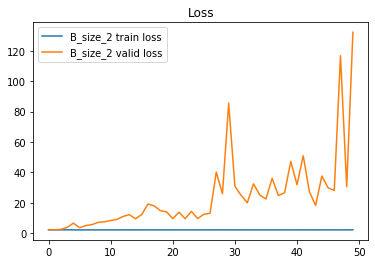

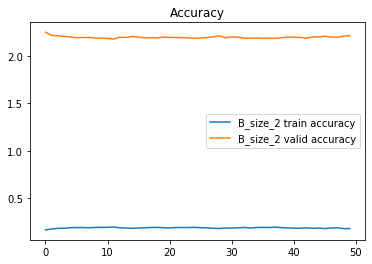

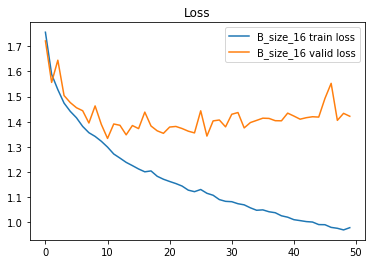

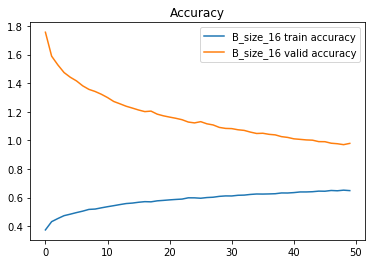

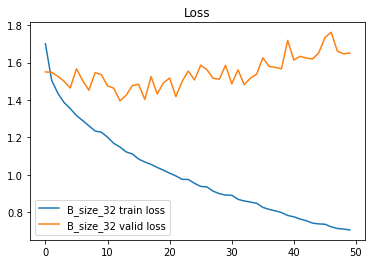

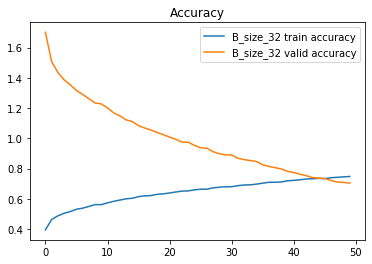

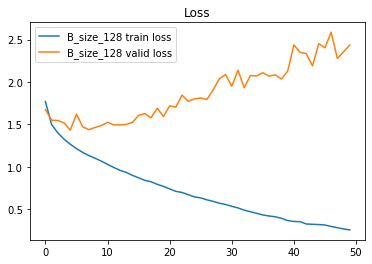

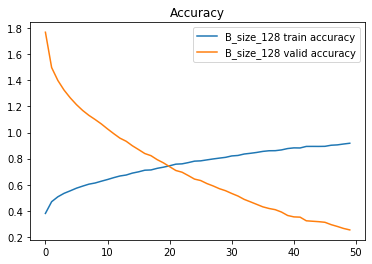

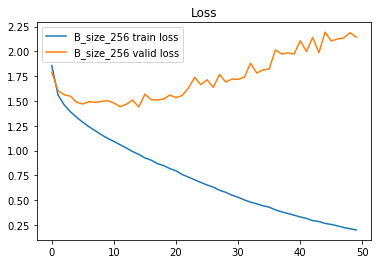

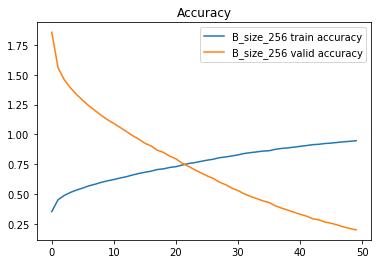

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in [2, 16, 32, 128, 256]:
    plt.plot(range(len(results[i][0])), results[i][0], label=f"B_size_{i} train loss")
    plt.plot(range(len(results[i][1])), results[i][1], label=f"B_size_{i} valid loss")
    plt.legend()
    plt.title("Loss")
    plt.show()

    plt.plot(range(len(results[i][2])), results[i][2], label=f"B_size_{i} train accuracy")
    plt.plot(range(len(results[i][3])), results[i][3], label=f"B_size_{i} valid accuracy")
    plt.legend()
    plt.title("Accuracy")
    plt.show()

## BN after activation

In [32]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [ 32, 128, 256 ]
MOMENTUM = 0.95

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for b in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=b, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    results[b] = [train_loss, valid_loss, train_acc, train_loss]

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_14 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_15 (Batc (None, 128)               512       
_________________________________________________________________
output (Dense)               (None, 10)                1290

50000/50000 [==============================] - 66s 1ms/step - loss: 0.8837 - accuracy: 0.6841 - val_loss: 1.5660 - val_accuracy: 0.5079
Epoch 47/50
50000/50000 [==============================] - 43s 868us/step - loss: 0.8676 - accuracy: 0.6898 - val_loss: 1.5326 - val_accuracy: 0.4972
Epoch 48/50
50000/50000 [==============================] - 43s 859us/step - loss: 0.8532 - accuracy: 0.6931 - val_loss: 1.5740 - val_accuracy: 0.5018
Epoch 49/50
50000/50000 [==============================] - 36s 725us/step - loss: 0.8442 - accuracy: 0.6975 - val_loss: 1.5900 - val_accuracy: 0.5074
Epoch 50/50
50000/50000 [==============================] - 38s 753us/step - loss: 0.8386 - accuracy: 0.7017 - val_loss: 1.5305 - val_accuracy: 0.5133
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3072)              0         
_________________________________________________

Epoch 42/50
50000/50000 [==============================] - 10s 201us/step - loss: 0.6084 - accuracy: 0.7871 - val_loss: 2.0487 - val_accuracy: 0.4693
Epoch 43/50
50000/50000 [==============================] - 10s 199us/step - loss: 0.5889 - accuracy: 0.7938 - val_loss: 1.8874 - val_accuracy: 0.4823
Epoch 44/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.5812 - accuracy: 0.7951 - val_loss: 1.8076 - val_accuracy: 0.4821
Epoch 45/50
50000/50000 [==============================] - 10s 198us/step - loss: 0.5650 - accuracy: 0.8021 - val_loss: 1.9135 - val_accuracy: 0.4738
Epoch 46/50
50000/50000 [==============================] - 11s 214us/step - loss: 0.5466 - accuracy: 0.8097 - val_loss: 1.8150 - val_accuracy: 0.4806
Epoch 47/50
50000/50000 [==============================] - 10s 198us/step - loss: 0.5413 - accuracy: 0.8120 - val_loss: 1.9356 - val_accuracy: 0.4831
Epoch 48/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.5184 - accuracy:

50000/50000 [==============================] - 6s 128us/step - loss: 0.6315 - accuracy: 0.7845 - val_loss: 1.6631 - val_accuracy: 0.4914
Epoch 39/50
50000/50000 [==============================] - 6s 127us/step - loss: 0.6090 - accuracy: 0.7931 - val_loss: 1.7848 - val_accuracy: 0.4608
Epoch 40/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.5930 - accuracy: 0.7979 - val_loss: 1.7000 - val_accuracy: 0.4963
Epoch 41/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.5826 - accuracy: 0.8022 - val_loss: 1.8145 - val_accuracy: 0.4730
Epoch 42/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.5654 - accuracy: 0.8086 - val_loss: 1.7053 - val_accuracy: 0.4990
Epoch 43/50
50000/50000 [==============================] - 7s 133us/step - loss: 0.5441 - accuracy: 0.8156 - val_loss: 1.7922 - val_accuracy: 0.4951
Epoch 44/50
50000/50000 [==============================] - 7s 148us/step - loss: 0.5252 - accuracy: 0.8238 - val_loss:

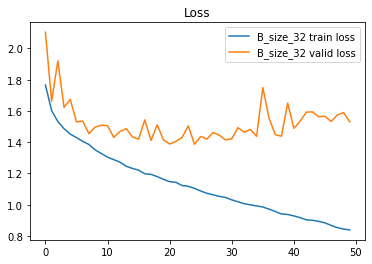

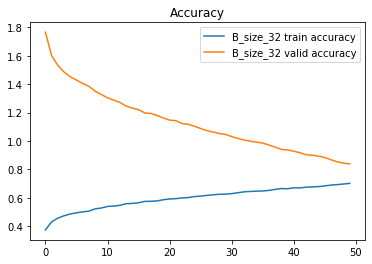

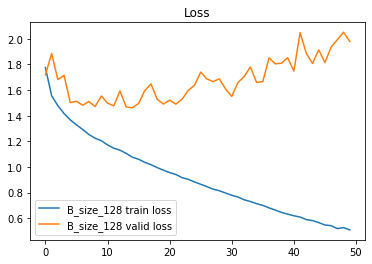

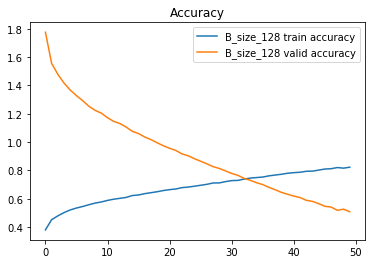

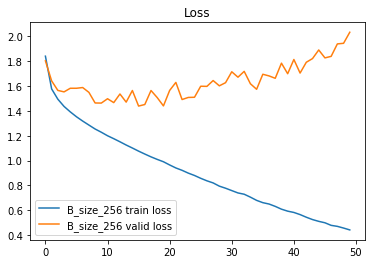

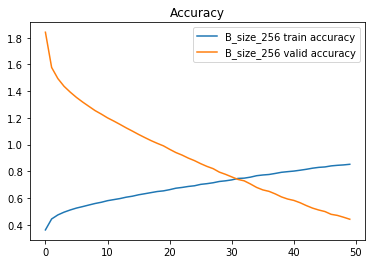

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in [ 32, 128, 256]:
    plt.plot(range(len(results[i][0])), results[i][0], label=f"B_size_{i} train loss")
    plt.plot(range(len(results[i][1])), results[i][1], label=f"B_size_{i} valid loss")
    plt.legend()
    plt.title("Loss")
    plt.show()

    plt.plot(range(len(results[i][2])), results[i][2], label=f"B_size_{i} train accuracy")
    plt.plot(range(len(results[i][3])), results[i][3], label=f"B_size_{i} valid accuracy")
    plt.legend()
    plt.title("Accuracy")
    plt.show()

In [ ]:
##


In [39]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [32, 128, 256 ]
MOMENTUM = 0.95

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for b in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=b, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    results[b] = [train_loss, valid_loss, train_acc, train_loss]

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_35 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_36 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_37 (Batc (None, 128)               512

50000/50000 [==============================] - 35s 694us/step - loss: 0.8223 - accuracy: 0.7072 - val_loss: 1.6009 - val_accuracy: 0.4946
Epoch 46/50
50000/50000 [==============================] - 33s 669us/step - loss: 0.8069 - accuracy: 0.7106 - val_loss: 1.5957 - val_accuracy: 0.4943
Epoch 47/50
50000/50000 [==============================] - 37s 732us/step - loss: 0.8002 - accuracy: 0.7143 - val_loss: 1.6081 - val_accuracy: 0.4925
Epoch 48/50
50000/50000 [==============================] - 35s 696us/step - loss: 0.7994 - accuracy: 0.7150 - val_loss: 1.5314 - val_accuracy: 0.5167
Epoch 49/50
50000/50000 [==============================] - 33s 667us/step - loss: 0.7875 - accuracy: 0.7165 - val_loss: 1.6038 - val_accuracy: 0.5059
Epoch 50/50
50000/50000 [==============================] - 34s 681us/step - loss: 0.7765 - accuracy: 0.7202 - val_loss: 1.5883 - val_accuracy: 0.5127
Model: "model_16"
_________________________________________________________________
Layer (type)                

Epoch 40/50
50000/50000 [==============================] - 11s 221us/step - loss: 0.3683 - accuracy: 0.8723 - val_loss: 2.4224 - val_accuracy: 0.4608
Epoch 41/50
50000/50000 [==============================] - 11s 213us/step - loss: 0.3575 - accuracy: 0.8772 - val_loss: 2.2777 - val_accuracy: 0.4559
Epoch 42/50
50000/50000 [==============================] - 11s 220us/step - loss: 0.3465 - accuracy: 0.8800 - val_loss: 2.5208 - val_accuracy: 0.4426
Epoch 43/50
50000/50000 [==============================] - 11s 229us/step - loss: 0.3397 - accuracy: 0.8820 - val_loss: 2.5504 - val_accuracy: 0.4503
Epoch 44/50
50000/50000 [==============================] - 12s 235us/step - loss: 0.3372 - accuracy: 0.8831 - val_loss: 2.4306 - val_accuracy: 0.4534
Epoch 45/50
50000/50000 [==============================] - 17s 332us/step - loss: 0.3214 - accuracy: 0.8894 - val_loss: 2.3515 - val_accuracy: 0.4771
Epoch 46/50
50000/50000 [==============================] - 11s 222us/step - loss: 0.3053 - accuracy:

50000/50000 [==============================] - 7s 140us/step - loss: 0.3854 - accuracy: 0.8774 - val_loss: 1.9910 - val_accuracy: 0.4672
Epoch 36/50
50000/50000 [==============================] - 7s 146us/step - loss: 0.3674 - accuracy: 0.8827 - val_loss: 2.2212 - val_accuracy: 0.4460
Epoch 37/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.3484 - accuracy: 0.8906 - val_loss: 2.0532 - val_accuracy: 0.4671
Epoch 38/50
50000/50000 [==============================] - 8s 151us/step - loss: 0.3240 - accuracy: 0.9015 - val_loss: 2.0559 - val_accuracy: 0.4765
Epoch 39/50
50000/50000 [==============================] - 8s 151us/step - loss: 0.3059 - accuracy: 0.9067 - val_loss: 2.1753 - val_accuracy: 0.4645
Epoch 40/50
50000/50000 [==============================] - 7s 147us/step - loss: 0.2900 - accuracy: 0.9115 - val_loss: 2.2383 - val_accuracy: 0.4643
Epoch 41/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.2739 - accuracy: 0.9188 - val_loss:

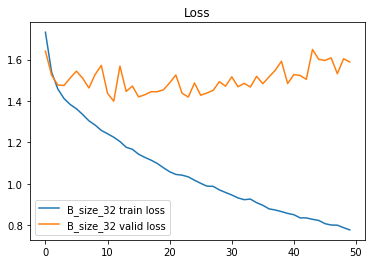

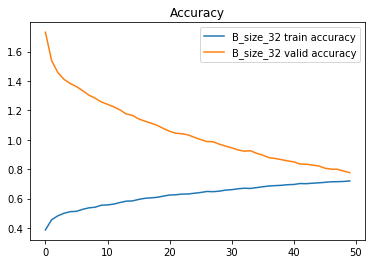

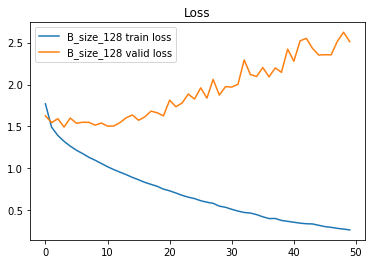

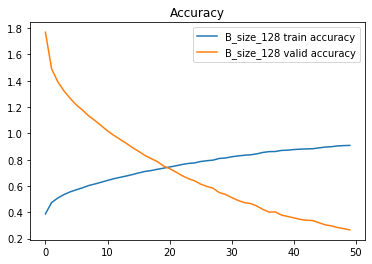

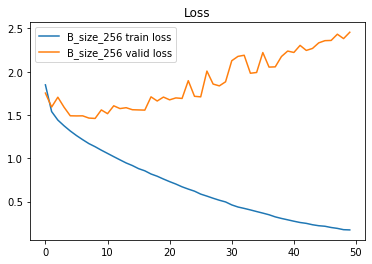

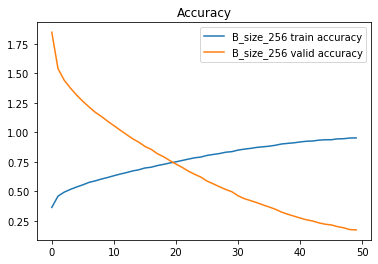

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in [ 32, 128, 256]:
    plt.plot(range(len(results[i][0])), results[i][0], label=f"B_size_{i} train loss")
    plt.plot(range(len(results[i][1])), results[i][1], label=f"B_size_{i} valid loss")
    plt.legend()
    plt.title("Loss")
    plt.show()

    plt.plot(range(len(results[i][2])), results[i][2], label=f"B_size_{i} train accuracy")
    plt.plot(range(len(results[i][3])), results[i][3], label=f"B_size_{i} valid accuracy")
    plt.legend()
    plt.title("Accuracy")
    plt.show()